In [1]:
import torch
import pandas as pd
from torch import nn
from PIL import Image
import re

/homes/yg007/nytimes_project/venv_nyc/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def load_tensor(filepath):
    tensor = torch.load(filepath)
    return tensor

In [3]:
root_dir = '/import/network-temp/yimengg/data/'
base_model = 'blip-2'
few_shot_topic = 'military'
epoch = 9

In [4]:
test_pred_few_shot_on_military = load_tensor(root_dir + f'twitter-comms/processed_data/tensor/{base_model}_test_pred_fs_{few_shot_topic}_epoch_{epoch}.pt')
test_true = load_tensor(root_dir + f'twitter-comms/processed_data/tensor/{base_model}_test_true_fs_{few_shot_topic}_epoch_{epoch}.pt')

assert test_pred_few_shot_on_military.shape == torch.Size([22082, 2])
assert test_true.shape == torch.Size([22082])

test_pred_full_train = load_tensor(root_dir + f'twitter-comms/processed_data/tensor/{base_model}_test_pred_fs_None_epoch_{epoch}.pt')

In [5]:
feather_path = '../raw_data/val_completed_exist.feather'

df = pd.read_feather(feather_path)

In [14]:
df['is_military'] = df['topic'].apply(lambda topic: 'military' in topic)
row_excluded = df[df["is_military"] == True].index

In [15]:
print(row_excluded)   # elements in row_excluded are indices of the dataframe

Int64Index([14944, 14945, 14946, 14947, 14948, 14949, 14950, 14951, 14952,
            14953,
            ...
            22072, 22073, 22074, 22075, 22076, 22077, 22078, 22079, 22080,
            22081],
           dtype='int64', length=7138)


In [34]:
idx = 14952
print("few shot on military:")
print(test_pred_few_shot_on_military[row_excluded[20:30], :])
print("full train:")
print(test_pred_full_train[row_excluded[20:30], :])
print("ground true:")
print(test_true[row_excluded[20:30]])

few shot on military:
tensor([[0.9401, 0.0599],
        [0.9401, 0.0599],
        [0.0844, 0.9156],
        [0.8804, 0.1196],
        [0.9571, 0.0429],
        [0.9252, 0.0748],
        [0.9252, 0.0748],
        [0.4426, 0.5574],
        [0.5611, 0.4389],
        [0.9801, 0.0199]], device='cuda:0')
full train:
tensor([[0.5814, 0.4186],
        [0.5814, 0.4186],
        [0.0624, 0.9376],
        [0.4702, 0.5298],
        [0.6837, 0.3163],
        [0.6671, 0.3329],
        [0.6671, 0.3329],
        [0.3372, 0.6628],
        [0.2761, 0.7239],
        [0.8873, 0.1127]], device='cuda:0')
ground true:
tensor([0, 0, 1, 1, 1, 0, 0, 1, 1, 0])


In [16]:
label_pred_few_shot_on_military = torch.zeros_like(test_true)
label_pred_few_shot_on_military[test_pred_few_shot_on_military[:, 1] >= 0.5] = 1

misclassified_indices_few_shot_on_military = (((label_pred_few_shot_on_military[row_excluded] == test_true[row_excluded])==False).nonzero(as_tuple=True)[0])

In [17]:
print(misclassified_indices_few_shot_on_military)

tensor([   3,    4,   14,  ..., 7115, 7122, 7130])


In [18]:
label_pred_full_train = torch.zeros_like(test_true)
label_pred_full_train[test_pred_full_train[:, 1] >= 0.5] = 1
misclassified_indices_full_train = (((label_pred_full_train[row_excluded] == test_true[row_excluded])==False).nonzero(as_tuple=True)[0])   # elements are indices of the row_excluded

In [19]:
misclassified_indices_set_few_shot_on_military = set(misclassified_indices_few_shot_on_military.tolist())   # 1961

print(len(misclassified_indices_set_few_shot_on_military))

1961


In [20]:
misclassified_indices_set_full_train = set(misclassified_indices_full_train.tolist())   # 1367

print(len(misclassified_indices_set_full_train))

1367


In [21]:
few_shot_difference = misclassified_indices_set_few_shot_on_military.difference(misclassified_indices_set_full_train)   # 1052: falsified(540), not-falsified(512)

union = misclassified_indices_set_few_shot_on_military.union(misclassified_indices_set_full_train)   # 2419

intersection = misclassified_indices_set_few_shot_on_military.intersection(misclassified_indices_set_full_train)   # 909

In [55]:
torch.tensor(list(few_shot_difference))[-50:]

tensor([1947, 6045, 1951, 1952, 1953, 4002, 4003, 1956, 6049, 6054, 1961, 6058,
        6061, 1966, 1967, 4016, 6062, 1971, 1972, 6068, 4022, 6070, 6071, 1978,
        1981, 1982, 6080, 4033, 1988, 6086, 6088, 4042, 4043, 1999, 4047, 4053,
        2009, 4058, 6108, 6116, 4069, 4070, 2027, 4080, 6128, 2041, 4091, 4092,
        4093, 2047])

In [51]:
sum(test_true[torch.tensor(list(few_shot_difference))])

tensor(540)

few shot on military:
tensor([0.9182, 0.0818], device='cuda:0')
full train:
tensor([0.2932, 0.7068], device='cuda:0')
ground true:
tensor(1)


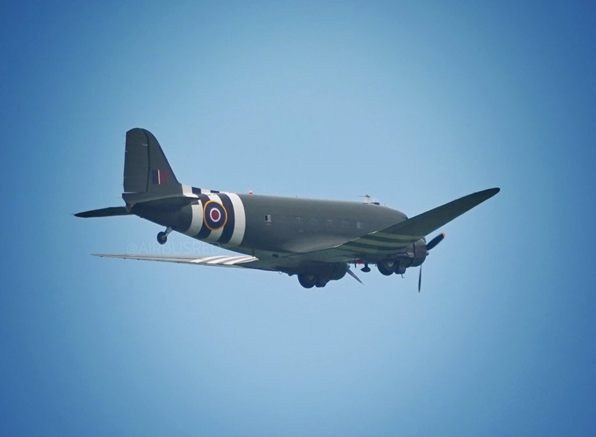

"RAF Fighters vs Luftwaffe Bombers"
Artist: Jim Laurier
Osprey Publishing

#do17 #battleofbritain #luftwaffe #raf #theaviationart  #Artwork #Aviationart #Airplane #Planes #aviationpic #airforce #plane #art #military #aircraft #ww2 #ww2planes #ww2aircraft #theaviationartofficial https://t.co/5eP0GNeJEG


In [97]:
idx = 6062
print("few shot on military:")
print(test_pred_few_shot_on_military[row_excluded[idx], :])
print("full train:")
print(test_pred_full_train[row_excluded[idx], :])
print("ground true:")
print(test_true[row_excluded[idx]])

item = df.iloc[row_excluded[idx]]
filename = item['filename']
full_text = item['full_text']

img_dir=root_dir+'twitter-comms/images/val_images/val_tweet_image_ids'

raw_image = Image.open(img_dir+'/'+filename).convert('RGB')
display(raw_image.resize((596, 437)))
print(full_text)

In [75]:
def remove_url(text):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", '', text)

In [80]:
def remove_punc(text):
    """Remove punctuation from a sample string"""
    return re.sub(r'[^\w\s]', '', text)

In [89]:
remove_punc(remove_url(full_text))

'The Boeing Chinook CH47 features the Displacement Gyro by Lear Siegler Part Number 1489570101 This impressive rotorcraft is supported in our MRO Capabilities Platforms for Boeing  \napmechanic boeing mro capabilities aviationlovers fleetsupplies '